In [57]:
#import required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [58]:
#import database
df = pd.read_csv('C:\\Users\\Dell\\Desktop\\test\\loan_data_set.csv')

In [59]:
#get some top rows of the database
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [60]:
#drop Loan_ID and Loan_Status
df = df.drop('Loan_ID', axis=1)
df = df.drop('Loan_Status', axis=1)

In [61]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [62]:
#remove Nan Values
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["LoanAmount"],inplace=True)

In [63]:
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["Dependents"],inplace=True)

In [69]:
#get the datatypes of all the coloumns
df.dtypes

Gender                object
Married                int32
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [70]:
#Since it is showing the error that "3+" cannot be converted to int therefore we have replaced it with "3" 
df.Dependents=df.Dependents.replace(to_replace=['3+'],value='3')



In [71]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,Male,1,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,1,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [72]:
#convert Object to String
df["Dependents"]=df["Dependents"].astype(str).astype(int)


In [73]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,Male,1,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,1,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [74]:
#Updated datatype 
df.dtypes

Gender                object
Married                int32
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

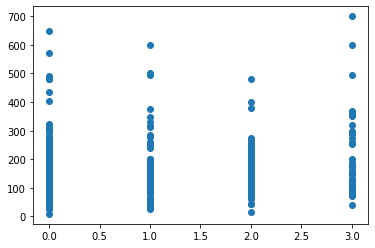

In [75]:
#plot Scatter plot
plt.scatter(df.Dependents,df.LoanAmount)

In [76]:
#From scatter plot we can see that there are 4 cluster.
km = KMeans(n_clusters=4)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [77]:
#Here, we are basically creating an array which will predict and fit the two columns in an array 
y_predicted = km.fit_predict(df[['Dependents','LoanAmount']])
y_predicted

array([1, 0, 0, 1, 3, 0, 1, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 3, 0, 0, 1, 1, 1, 0, 0, 1, 0, 3, 0, 3, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 3, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 3, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       3, 0, 1, 0, 1, 0, 3, 1, 1, 2, 0, 0, 0, 0, 3, 0, 0, 3, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 3, 0, 0, 1, 3, 0, 0, 2, 1, 1, 0, 3, 0, 3, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 3, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 3, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 3,
       1, 1, 3, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 3, 1, 3,
       0, 0, 3, 1, 3, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [78]:
#y_predicted added to the database with a coloumn name "cluster" 
df["cluster"] = y_predicted
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,cluster
1,Male,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,Male,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,Male,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,Male,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,1,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,3


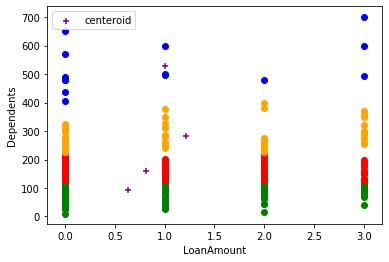

In [79]:
#plot the KMeans plot.

df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]

plt.scatter(df1.Dependents,df1.LoanAmount,color="green")
plt.scatter(df2.Dependents,df2.LoanAmount,color="red")
plt.scatter(df3.Dependents,df3.LoanAmount,color="blue")
plt.scatter(df4.Dependents,df4.LoanAmount,color="orange")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centeroid')
plt.xlabel('LoanAmount')
plt.ylabel('Dependents')
plt.legend()
